# Test 2b - Merge, Aggregate, Visualize

## Introduction

This problem tests your ability to merge, aggregate, and visualize data.
You'll work with realistic business data to answer questions about product profitability.

Before submitting, ensure your notebook:

- Includes your verification info (Banner ID and code) as the first cell
- Runs completely with "Kernel → Restart & Run All"
- Shows your work (don't just print final answers)
- Includes your interpretation responses at the end

## Dataset: Bean & Brew Coffee Shop

You've been hired to analyze sales data for Bean & Brew, a local coffee shop chain with three locations. The owner wants to understand which products are most profitable and how profitability varies across locations.

There are two data files:

- `sales.csv` - Individual transaction records
  - `transaction_id`: Unique transaction identifier
  - `timestamp`: Date and time of purchase (format: 'YYYY-MM-DD HH:MM:SS')
  - `location`: Store location ('Downtown', 'Campus', 'Suburb')
  - `product_id`: Product identifier (links to products table)
  - `quantity`: Number of units sold
  - `revenue`: Total revenue from transaction
  - `payment_method`: Payment type ('Cash', 'Credit', 'Mobile')
  - `loyalty_member`: Boolean indicating if customer is loyalty program member
- `products.csv` - Product catalog
  - `product_id`: Unique product identifier
  - `name`: Product name
  - `category`: Product category ('Coffee', 'Tea', 'Pastry', 'Sandwich')
  - `cost`: Cost to make/acquire one unit (for profit calculation)

The dataset contains two weeks of sales data (approximately 3,000 transactions) across 18 products. It includes both regular and premium items in each category.

We are interested in learning which product categories generate the most profit, and how does profitability vary across locations? Complete the following tasks to answer those questions and more.

## Scoring

Total: 30 points (+ 5 bonus)

- Tasks 1-6: 18 points
- Interpretation (Questions 1-4): 12 points
- Bonus: 5 points (optional)

## Generate Your Dataset

Before starting the analysis, you need to generate your unique dataset using your Banner ID.

1. Open a terminal in the folder containing `generate_test2b_data.py`
2. Activate your conda virtual environment
3. Run: `python generate_test2b_data.py`
4. Enter your 9-digit Banner ID when prompted (you'll enter it twice to confirm)

The script will create two files in the `data/` folder:

- `data/products.csv` - Product catalog
- `data/sales.csv` - Transaction records

Important: At the end, the script displays a verification block like this:

```
======================================================================
DATA VERIFICATION INFORMATION
======================================================================
banner id:          904123456
verification code:  5e0dXXXXXXXX
======================================================================
```

Copy the banner id and verification code lines and paste them into the cell below. This is required for submission.

```
banner id:          904433492
verification code:  840c4705f0ec

```

## Setup: Load the Data

Run the cell below to load the data. The code is provided for you.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data (provided)
sales = pd.read_csv('data/sales.csv', parse_dates=['timestamp'])
products = pd.read_csv('data/products.csv')

print(f"Sales: {len(sales)} transactions")
print(f"Products: {len(products)} items in catalog")
print()
print("Sales preview:")
sales.head()

Sales: 3023 transactions
Products: 18 items in catalog

Sales preview:


,transaction_id,timestamp,location,product_id,quantity,revenue,payment_method,loyalty_member
0,1002,2025-11-10 06:29:00,Campus,103,1.0,4.20,Credit,False
1,1000,2025-11-10 06:34:00,Campus,114,1.0,4.52,Mobile,False
2,1003,2025-11-10 06:44:00,Downtown,112,1.0,3.36,Credit,False
3,1004,2025-11-10 06:44:00,Suburb,200,1.0,3.82,Mobile,True
4,1001,2025-11-10 06:49:00,Campus,101,1.0,2.72,Cash,False


In [2]:
# Products catalog
products

,product_id,name,category,cost
0,101,Espresso,Coffee,1.2
1,102,Cappuccino,Coffee,1.8
2,103,Latte,Coffee,1.9
3,104,Americano,Coffee,1.0
4,105,Cold Brew,Coffee,1.5
5,106,Nitro Cold Brew,Coffee,2.5
6,107,Green Tea,Tea,0.8
7,108,Chai Latte,Tea,1.2
8,109,Herbal Tea,Tea,0.7
9,110,Premium Matcha,Tea,2.2


## Task 1: Data Quality Check

Investigate the sales data quality and coverage. Your code should answer the following questions:

1. How many missing values are in each column?
2. How many unique product IDs appear in the sales data? Compare this to the catalog size.
3. What is the date range (earliest and latest transaction)?

### Your Code

In [3]:
# Task 1: use isna(), nunique(), min/max on timestamp

# Finding which columns have missing values 
missing_values = sales.isna().sum()
print("Missing values for each column:")
print(missing_values)
print("\n")


# Getting unique product IDs
unique_products = sales["product_id"].nunique()         # for the sales data
catalog_size = products["product_id"].nunique()          # from the product data

print(f"Unique product IDs in sales data: {unique_products}")
print(f"Number of products in catalog: {catalog_size}")
print("\n")

# Getting the date range for transactions
earliest_transaction = sales["timestamp"].min()
latest_transaction = sales["timestamp"].max()

print(f"Earliest transaction date: {earliest_transaction}")
print(f"Latest transaction date: {latest_transaction}")



Missing values for each column:
transaction_id    0
timestamp         0
location          0
product_id        0
quantity          7
revenue           2
payment_method    0
loyalty_member    0
dtype: int64


Unique product IDs in sales data: 21
Number of products in catalog: 18


Earliest transaction date: 2025-11-10 06:29:00
Latest transaction date: 2025-11-23 21:30:00


**There are 3 more unique products in the sales that are not in the product catalog**

## Task 2: Merge Sales with Products

Merge the sales and products DataFrames to add product information (name, category, cost) to each transaction.

### Your Code

In [4]:
# Task 2: use pd.merge() with appropriate join type

# Merging the sales and product DataFrame 

merged_df = pd.merge(sales, products, on = "product_id", how = "left")
merged_df.head


<bound method NDFrame.head of       transaction_id           timestamp  location  product_id  quantity  \
0               1002 2025-11-10 06:29:00    Campus         103       1.0   
1               1000 2025-11-10 06:34:00    Campus         114       1.0   
2               1003 2025-11-10 06:44:00  Downtown         112       1.0   
3               1004 2025-11-10 06:44:00    Suburb         200       1.0   
4               1001 2025-11-10 06:49:00    Campus         101       1.0   
...              ...                 ...       ...         ...       ...   
3018            4013 2025-11-23 19:25:00    Suburb         107       1.0   
3019            4012 2025-11-23 19:42:00    Suburb         113       1.0   
3020            4016 2025-11-23 20:35:00    Suburb         109       2.0   
3021            4015 2025-11-23 20:56:00    Suburb         109       1.0   
3022            4017 2025-11-23 21:30:00    Suburb         109       1.0   

      revenue payment_method  loyalty_member           na

## Task 3: Verify the Merge

After merging, verify that the merge worked correctly:

1. Compare the shape of the merged DataFrame to the original sales data
2. Check if any rows have missing values in the product columns (name, category, cost)
3. If there are missing values, identify which product_id(s) are causing the problem

### Your Code

In [5]:
# Task 3: check shape, isna() on product columns, filter to find problem IDs

# comparing the shape of the merged dataFrame and that of sales
sales_shape = sales.shape
merged_df_shape = merged_df.shape
print("original data:", sales_shape, "merged data:", merged_df_shape)

# checking for missing data in product data
merged_df[["name", "category", "cost"]].isna().sum() 

# getting the rows with missing data
missing_rows = merged_df[merged_df[["name", "category", "cost"]].isna().any(axis=1)]
missing_rows.head

# product_ids with problem
problem_ids = missing_rows["product_id"].unique()
print("IDs with problem:", problem_ids)


original data: (3023, 8) merged data: (3023, 11)
IDs with problem: [200 199 201]


## Task 4: Profit by Category

First, calculate profit for each transaction: `profit = revenue - (cost × quantity)`

Then summarize profitability by product category. Your code should return a table that shows both total profit and number of transactions for each category. Sort it by total profit (highest first).

### Your Code

In [6]:
# Task 4: create profit column, then groupby with .agg()

# profit column
merged_df["profit"] = merged_df["revenue"] - (merged_df["cost"] * merged_df["quantity"])

#Profit summary
profit_summary = merged_df.groupby("category").agg(
    total_profit=("profit", "sum"),
    num_transactions=("revenue", "count"))

category_summary = profit_summary.sort_values(by="total_profit", ascending = False)
category_summary

,total_profit,num_transactions
category,,
Sandwich,4786.93,655
Coffee,2687.79,1097
Pastry,1685.16,586
Tea,1004.84,668


## Task 5: Profit by Category and Location

Analyze how profitability varies by both category and location. Your code should produce a table that shows the following for every combination of category and location:

- Total profit
- Average profit per transaction
- Number of transactions

Display the results as a flat table (i.e., without a nested/hierarchical index).

### Your Code

In [7]:
# Task 5: groupby multiple columns, .agg() with dict, reset_index()


# Profit analysis by category and location
category_location_summary = merged_df.groupby(["category", "location"]).agg(
    total_profit=("profit", "sum"),
    avg_profit=("profit", "mean"),
    num_transactions=("profit", "count")
).reset_index()           # reset_index flattens the table


category_location_summary

,category,location,total_profit,avg_profit,num_transactions
0,Coffee,Campus,1272.76,2.033163,626
1,Coffee,Downtown,1213.05,3.158984,384
2,Coffee,Suburb,201.98,2.376235,85
3,Pastry,Campus,623.08,2.424436,257
4,Pastry,Downtown,628.43,3.550452,177
5,Pastry,Suburb,433.65,2.891000,150
6,Sandwich,Campus,818.54,5.931449,138
7,Sandwich,Downtown,3000.26,8.065215,372
8,Sandwich,Suburb,968.13,6.723125,144
9,Tea,Campus,232.90,1.194359,195


## Task 6: Visualize Category Profitability

Create a bar chart showing total profit by product category. Use seaborn and ensure that the result:

- Has clearly labeled categories
- Includes a descriptive title
- Makes it clear which category is most/least profitable

### Your Code

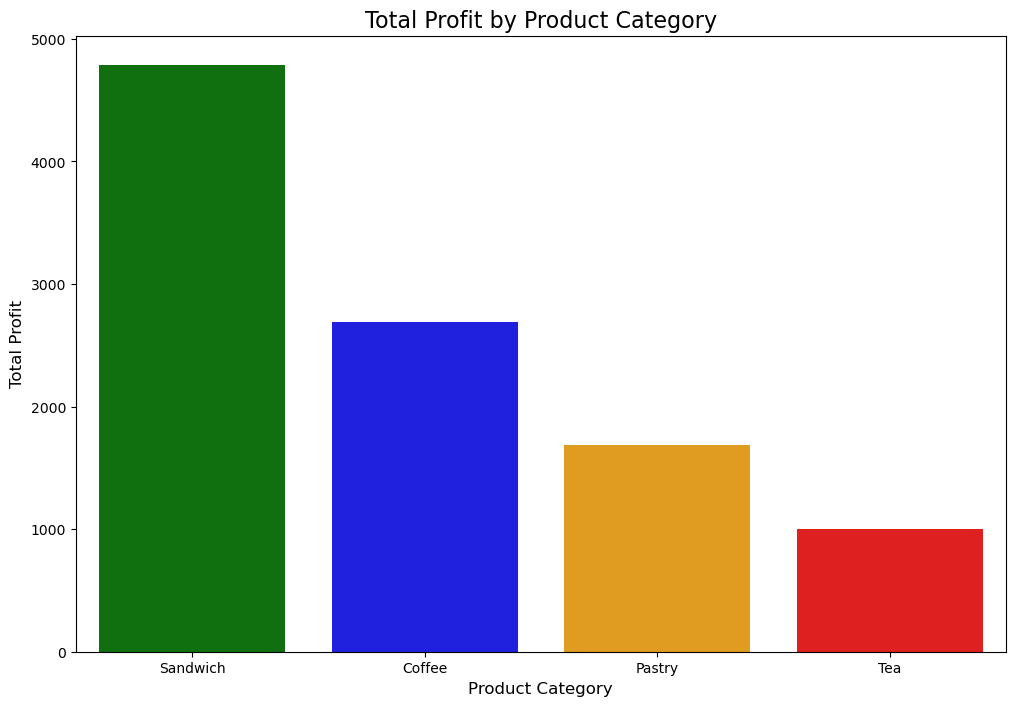

In [8]:
# Task 6: use sns.barplot() with aggregated data


# bar chart showing total profit by product category

plt.figure(figsize=(12,8))
sns.barplot(
    data= category_summary, 
    x="category", 
    y="total_profit",
    hue="category", 
    palette=["green", "blue", "orange", "red"],
)

plt.title("Total Profit by Product Category", fontsize=16)
plt.xlabel("Product Category", fontsize=12)
plt.ylabel("Total Profit", fontsize=12)

plt.show()


## Interpretation

Concisely answer the following questions based on your analysis.


1. What might go wrong if you did not verify the merge in Task 3 before proceeding with the analysis?
2. In Tasks 4 and 5, you aggregated data at different levels of detail (by category, then by category and location). How did this change what you could learn from the data?
3. Reflect on the patterns you discovered in your analysis. What valuable insights did your work generate?
4. The coffee shop owner asks: "Based on your analysis, what's the single most important thing I should do to improve profitability?" Provide a specific, actionable recommendation. Justify your recommendation with evidence from your analysis (include specific numbers from your results). Also, suggest additional analysis that you feel might be worthwhile.

### Your Answers

*Interpretation responses here*

1. If the merge was not verified, further analysis such as the profit by category and location would have been incorrect. That is to say if the right join type was not used all other analysis will be wrong so verification is needed to show that the right merge was done.

2. Aggregating at the category level gave details of the profits of categories in general but by category and location gives specific details of the profit of each category based on the locations. This will help in making informed decisions on where specificallly to reach to increase profits.

3. It was seen that the number of transactions does not determine the profit. Sandwich category had the second lowest number of transactions but gave the highest profit. It was also seen that on an average, the downtown locations generated more profits followed by campus and suburb with the lowest.

4. Sandwich generated more profit specifically in downtown with almost equal or less number of transactions compared to the other categories in downtown. 3000.26 profit was generated from sandwich for 372 transactions. Sandwich should be advertised well in downtown areas to increase the number of transactions leading profit improvement.

Further analysis can be done to identify which particular type of sandwich people patronize based on the locations and which generates more profit.


## Bonus: Time-Based Analysis (Optional)

For extra credit, investigate a time-based question of your choosing. Examples of questions you could explore include:

- Do sales patterns differ between weekdays and weekends?
- Which hours are busiest at each location?
- Is there a day of the week that stands out for profitability?

For full credit you must:

- State your question clearly
- Show your analysis code
- Summarize what you found in 2-3 sentences

In [9]:
# Bonus: Your time-based analysis here
# Since sandwich generated the highest profit I want to know the hour of the day which gave more transactions and profit

# filtering sandwich `
sandwich_sales = merged_df[merged_df["category"] == "Sandwich"].copy()

# Extracting the hours
sandwich_sales["hour"] = sandwich_sales["timestamp"].dt.hour

# Number of transactions per hour and profit
hour_profit = sandwich_sales.groupby("hour").agg(
    total_profit=("profit", "sum"),
    num_transactions=("transaction_id", "nunique")
).reset_index()

hour_profit

# Most profitable hour of the day
peak = hour_profit.loc[hour_profit["total_profit"].idxmax()]

print(
    f"Most profitable hour: {int(peak['hour'])} "
    f"pm with total profit = ${peak['total_profit']:} "
    f"from {peak['num_transactions']} transactions."
)


Most profitable hour: 12 pm with total profit = $2099.78 from 288.0 transactions.


From the analysis, it was discovered most of sandwich sales occured within the hours of 12:00 and 13:00 with 288 transactions, 2099.78 dollars profit and 226 transactions, 16610.00 dollars respectively.  A total profit of 3709.78 dollars accounting for 77.50% of the total profits generated from sandwich sales.

### Your Findings

*Question*
Which hour of the day generated more transactions and profit for sandwich sales ?

From the analysis, it was discovered most of sandwich sales occured within the hours of 12:00 and 13:00 with 288 transactions, 2099.78 dollars profit and 226 transactions, 16610.00 dollars respectively.  A total profit of 3709.78 dollars accounting for 77.50% of the total profits generated from sandwich sales.

## Submission

Ensure your notebook:

- Has the verification block (Banner ID and code) as the first cell
- Runs completely from top to bottom without errors
- Shows all task outputs clearly
- Includes all interpretation responses
- Is saved and committed to your repository

Follow the submission instructions on Canvas to submit your work.